In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [14]:
dataset_root = 'converted_dataset/'
scenario_type = 'following_lane_with_slow_lead'

In [15]:
# load ouput file
with open(dataset_root + scenario_type + '/look_ahead_pt_array.npy', 'rb') as f:
    look_ahead_pt_array = np.load(f, allow_pickle=True)
    
look_ahead_pt_array.shape

(2559, 3)

In [16]:
# load random input file
with open(dataset_root + scenario_type + '/observation_array.npy', 'rb') as f:
    observation = np.load(f, allow_pickle=True)
observation.shape

(2559, 101, 8)

In [353]:
len(observation[0][0])

8

# visualize

In [354]:
# random_idx= random.choice(range(len(observation)))
random_idx = 0
frame = observation[random_idx]
look_ahead_pt = look_ahead_pt_array[random_idx]

In [355]:
frame

array([[ 6.64896266e+05,  3.99965835e+06,  2.71206706e+00,
         5.64389726e-02, -3.55519145e-03,  5.63974371e-01,
        -3.75623741e-02,  1.00000000e+00],
       [ 6.64893561e+05,  3.99965626e+06,  2.69237556e+00,
        -1.68810613e+00,  8.04083746e-01, -2.42583736e-02,
         1.01859561e-02,  1.00000000e+00],
       [ 6.64904252e+05,  3.99965429e+06,  2.69443350e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 6.64899084e+05,  3.99967052e+06, -2.04823583e+00,
         2.95044729e-03, -5.12631964e-03,  1.18209424e-04,
        -5.05886114e-04,  1.00000000e+00],
       [ 6.64912888e+05,  3.99965035e+06,  2.71605197e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 6.64883800e+05,  3.99963923e+06,  2.15329313e+00,
         2.95812803e-02, -5.94859959e-03,  1.94470480e-03,
        -4.35717692e-04,  1.00000000e+00],
       [ 6.64882790e+05,  3.999639

In [356]:
ego_pose = frame[0]
objs_pose = frame[1:]
ego_pose

array([ 6.64896266e+05,  3.99965835e+06,  2.71206706e+00,  5.64389726e-02,
       -3.55519145e-03,  5.63974371e-01, -3.75623741e-02,  1.00000000e+00])

In [357]:
objs_pose[:,[0,1,2,3,4]]

array([[ 6.64893561e+05,  3.99965626e+06,  2.69237556e+00,
        -1.68810613e+00,  8.04083746e-01],
       [ 6.64904252e+05,  3.99965429e+06,  2.69443350e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.64899084e+05,  3.99967052e+06, -2.04823583e+00,
         2.95044729e-03, -5.12631964e-03],
       [ 6.64912888e+05,  3.99965035e+06,  2.71605197e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.64883800e+05,  3.99963923e+06,  2.15329313e+00,
         2.95812803e-02, -5.94859959e-03],
       [ 6.64882790e+05,  3.99963910e+06,  1.69481413e+00,
         5.32161001e-03,  1.57440502e-02],
       [ 6.64883426e+05,  3.99963738e+06,  1.24934576e+00,
         2.49688620e-01, -6.34280997e-02],
       [ 6.64880789e+05,  3.99963788e+06,  2.40274866e+00,
         1.06643014e-02, -4.13351370e-03],
       [ 6.64895543e+05,  3.99963202e+06, -6.54816672e-01,
         7.24852234e-01, -6.77225399e-01],
       [ 6.64880405e+05,  3.99963650e+06,  1.11401706e+00,
         1.44306770e-01

In [358]:
look_ahead_pt

array([6.64881320e+05, 3.99966368e+06, 5.29527105e+00])

In [359]:
ego_pose[4]

-0.0035551914486899477

**!!!ego vx and vy are w.r.t ego coordinate**

In [360]:
ego_vx = ego_pose[3]*np.cos(ego_pose[2]) - ego_pose[4]*np.sin(ego_pose[2])
ego_vy = ego_pose[3]*np.sin(ego_pose[2]) + ego_pose[4]*np.cos(ego_pose[2])

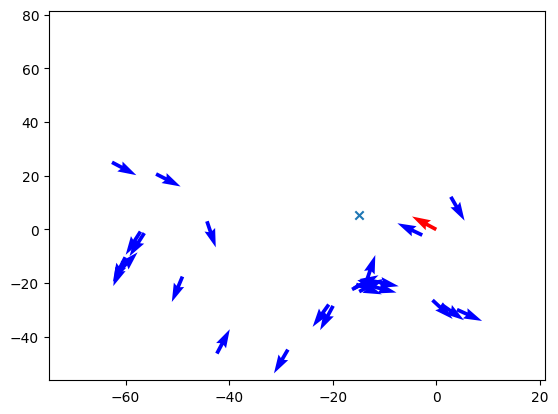

In [361]:
plt.quiver(0, 0, ego_vx, ego_vy, color='r')
plt.scatter(look_ahead_pt[0]-ego_pose[0], look_ahead_pt[1]-ego_pose[1], marker='x')

for obj in objs_pose:
    if obj[-1] == 0:
        continue
    plt.quiver(obj[0]-ego_pose[0], obj[1]-ego_pose[1], obj[3], obj[4], color='b')
    
plt.show()

## utm to bev

In [362]:
import numpy as np

def utm_to_bev(
        pt_utm_array: np.ndarray,
        ego_x_utm: float,
        ego_y_utm: float,
        ego_heading_utm: float
    ) -> np.ndarray:
    """Transform list of UTM points to BEV coordinate.

    Args:
        pt_utm_array (np.ndarray): List of UTM points. [[x, y, heading(Optional)]]
        ego_x_utm (float): Ego car x w.r.t. UTM
        ego_y_utm (float): Ego car y w.r.t. UTM
        ego_heading_utm (float): Ego car heading w.r.t. UTM

    Returns:
        np.ndarray: List of BEV points
    """
    
    def is_heading_provided() -> bool:
        return len(pt_utm_array[0]) > 2

    pt_bev_array = []
    for i in range(len(pt_utm_array)):
        pt_utm_x = pt_utm_array[i][0]
        pt_utm_y = pt_utm_array[i][1]

        pt_x_shifted = pt_utm_x - ego_x_utm
        pt_y_shifted = pt_utm_y - ego_y_utm

        pt_x_rotated = pt_x_shifted * np.cos(ego_heading_utm) \
                        + pt_y_shifted * np.sin(ego_heading_utm)
        pt_y_rotated = - pt_x_shifted * np.sin(ego_heading_utm) \
                        + pt_y_shifted * np.cos(ego_heading_utm)
        
        if is_heading_provided():
            pt_utm_heading = pt_utm_array[i][2]
            pt_heading_rotated = pt_utm_heading - ego_heading_utm
            pt_bev_array.append([pt_x_rotated, pt_y_rotated, pt_heading_rotated])
        else:
            pt_bev_array.append([pt_x_rotated, pt_y_rotated])

    pt_bev_array = np.asarray(pt_bev_array)
    return pt_bev_array

In [410]:
num_objs = 10

ego_bev = np.array([0, 0, 0])
objects_bev = utm_to_bev(objs_pose[0:num_objs,[0,1,2]], *ego_pose[0:3])
objects_v_bev = utm_to_bev(objs_pose[0:num_objs,[3, 4]], *ego_pose[0:3])

objects_v_bev = np.array([
    rotate_vec_2d(obj_v, -ego_pose[2]) for obj_v in objs_pose[0:num_objs,[3, 4]]
])
look_ahead_pt_bev = utm_to_bev([look_ahead_pt[:-1]], *ego_pose[0:3])

In [414]:
objects_bev

array([[-1.06111651e+06,  3.91323213e+06, -2.71206706e+00],
       [-1.06111651e+06,  3.91323213e+06, -2.71206706e+00],
       [-1.06111651e+06,  3.91323213e+06, -2.71206706e+00],
       [-1.06111651e+06,  3.91323213e+06, -2.71206706e+00],
       [ 2.94607125e+01, -2.67843352e+01, -4.75655810e+00],
       [-1.06111651e+06,  3.91323213e+06, -2.71206706e+00],
       [-1.06111651e+06,  3.91323213e+06, -2.71206706e+00],
       [ 1.92743220e+01,  5.96745910e+01, -1.59698558e+00],
       [-1.06111651e+06,  3.91323213e+06, -2.71206706e+00],
       [-1.06111651e+06,  3.91323213e+06, -2.71206706e+00]])

In [411]:
objects_v_bev

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [-0.1234341 , -2.11558358],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]])

In [412]:
look_ahead_pt_bev

array([[15.81127596,  1.37126987]])

TypeError: scatter() got multiple values for argument 'marker'

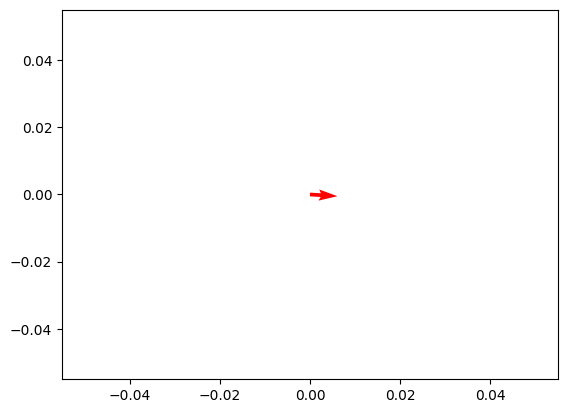

In [413]:
plt.quiver(ego_bev[0], ego_bev[1], ego_pose[3], ego_pose[4], color='r')
plt.scatter(*objects_bev[:,:2], marker='x')
plt.scatter(*look_ahead_pt_bev[0], marker='x')
for idx in range(len(objects_bev)):
    plt.quiver(objects_bev[idx][0], objects_bev[idx][1], objects_v_bev[idx][0], objects_v_bev[idx][1], color='b')
    
plt.show()

In [367]:
def rotate_vec_2d(
    vec: np.ndarray,
    radian: float,
) -> np.ndarray:
    """ Rotate a 2D vector clockwise.

    Args:
        vec (np.ndarray): Query 2d vector.
        radian (float): Radian to rotate, in rad.

    Returns:
        np.ndarray: Result 2d vector.
    """

    rotation_matrix = np.array([
        [np.cos(radian), -np.sin(radian)],
        [np.sin(radian), np.cos(radian)]
    ])

    return np.matmul(rotation_matrix, vec)

In [368]:
query_vec = np.array([1,0])
rotated_vec = rotate_vec_2d(query_vec, -np.pi/4)

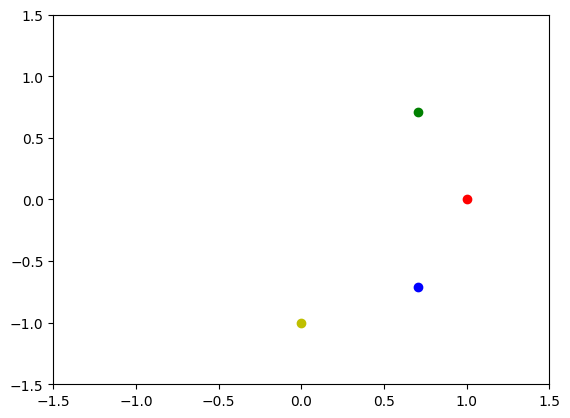

In [369]:
plt.scatter(*query_vec, color='r')
plt.scatter(*rotate_vec_2d(query_vec, 6*np.pi/4), color='y')
plt.scatter(*rotate_vec_2d(query_vec, np.pi/4), color='g')
plt.scatter(*rotate_vec_2d(query_vec, -np.pi/4), color='b')
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

In [370]:
def calculate_distance(
    query_point: np.ndarray,
    reference_point: np.ndarray
) -> float:
    """ Calculate distance between two points of any dimension.

    Args:
        query_point (np.ndarray): The query point.
        reference_point (np.ndarray): The reference point.

    Returns:
        float: distance
    """
    return np.linalg.norm(query_point-reference_point)

In [371]:
observation[0].shape

(101, 8)

In [372]:
selections = observation[0][:, -1].astype(bool)
selections

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [373]:
observation_filtered = observation[0][selections, :]
observation_filtered.shape

(44, 8)

In [374]:
observation[0]

array([[ 6.64896266e+05,  3.99965835e+06,  2.71206706e+00,
         5.64389726e-02, -3.55519145e-03,  5.63974371e-01,
        -3.75623741e-02,  1.00000000e+00],
       [ 6.64893561e+05,  3.99965626e+06,  2.69237556e+00,
        -1.68810613e+00,  8.04083746e-01, -2.42583736e-02,
         1.01859561e-02,  1.00000000e+00],
       [ 6.64904252e+05,  3.99965429e+06,  2.69443350e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 6.64899084e+05,  3.99967052e+06, -2.04823583e+00,
         2.95044729e-03, -5.12631964e-03,  1.18209424e-04,
        -5.05886114e-04,  1.00000000e+00],
       [ 6.64912888e+05,  3.99965035e+06,  2.71605197e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 6.64883800e+05,  3.99963923e+06,  2.15329313e+00,
         2.95812803e-02, -5.94859959e-03,  1.94470480e-03,
        -4.35717692e-04,  1.00000000e+00],
       [ 6.64882790e+05,  3.999639

In [375]:
distance = np.array([calculate_distance(obj_loc, observation[0][0,0:2]) for obj_loc in observation[0][1:, 0:2]])
distance

array([3.41880447e+00, 8.95832198e+00, 1.24958390e+01, 1.84447677e+01,
       2.28216630e+01, 2.34950318e+01, 2.45887452e+01, 2.56556650e+01,
       2.63324882e+01, 2.69988261e+01, 2.75212808e+01, 2.76387270e+01,
       2.79476510e+01, 3.01256920e+01, 3.47464128e+01, 3.47563877e+01,
       3.48325838e+01, 3.49592282e+01, 3.63319158e+01, 3.73849340e+01,
       3.87394733e+01, 3.98162554e+01, 4.12084949e+01, 4.15465205e+01,
       4.37432267e+01, 4.43967376e+01, 4.55240540e+01, 4.58591405e+01,
       4.69865305e+01, 5.20700432e+01, 5.31477829e+01, 5.64190931e+01,
       5.71405315e+01, 5.79339520e+01, 6.09521788e+01, 6.10395673e+01,
       6.14417879e+01, 6.27100973e+01, 6.34348080e+01, 6.41842760e+01,
       6.74543198e+01, 7.53727826e+01, 7.63280072e+01, 4.05454731e+06,
       4.05454731e+06, 4.05454731e+06, 4.05454731e+06, 4.05454731e+06,
       4.05454731e+06, 4.05454731e+06, 4.05454731e+06, 4.05454731e+06,
       4.05454731e+06, 4.05454731e+06, 4.05454731e+06, 4.05454731e+06,
      

In [376]:
near_selections = distance <= 100
near_selections

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [377]:
def shuffle_objects(observation: np.ndarray) -> np.ndarray:
    return np.random.shuffle(observation[1:, :])

In [378]:
observation[0]

array([[ 6.64896266e+05,  3.99965835e+06,  2.71206706e+00,
         5.64389726e-02, -3.55519145e-03,  5.63974371e-01,
        -3.75623741e-02,  1.00000000e+00],
       [ 6.64893561e+05,  3.99965626e+06,  2.69237556e+00,
        -1.68810613e+00,  8.04083746e-01, -2.42583736e-02,
         1.01859561e-02,  1.00000000e+00],
       [ 6.64904252e+05,  3.99965429e+06,  2.69443350e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 6.64899084e+05,  3.99967052e+06, -2.04823583e+00,
         2.95044729e-03, -5.12631964e-03,  1.18209424e-04,
        -5.05886114e-04,  1.00000000e+00],
       [ 6.64912888e+05,  3.99965035e+06,  2.71605197e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 6.64883800e+05,  3.99963923e+06,  2.15329313e+00,
         2.95812803e-02, -5.94859959e-03,  1.94470480e-03,
        -4.35717692e-04,  1.00000000e+00],
       [ 6.64882790e+05,  3.999639

In [379]:
shuffle_objects(observation[0])

In [380]:
observation[0]

array([[ 6.64896266e+05,  3.99965835e+06,  2.71206706e+00,
         5.64389726e-02, -3.55519145e-03,  5.63974371e-01,
        -3.75623741e-02,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 6.64880636e+05,  3.99969497e+06, -2.04449104e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.000000

In [381]:
import torch
import torch.nn.functional as F

In [382]:
x = np.array([
    [1.0, 20.0, 40.0, 0.0],
    [10.0, 4.0, 2.0, 1.0],
    [5.0, 12.0, 8.0, 0.0],
])
x

array([[ 1., 20., 40.,  0.],
       [10.,  4.,  2.,  1.],
       [ 5., 12.,  8.,  0.]])

In [383]:
(x.max(axis=0)-x.min(axis=0))

array([ 9., 16., 38.,  1.])

In [384]:
1.0e-12 * np.ones(x.shape[1])

array([1.e-12, 1.e-12, 1.e-12, 1.e-12])

In [385]:
numerator = (x - x.min(axis=0))
denominator = np.maximum(
    (x.max(axis=0)-x.min(axis=0)),
    1.0e-12 * np.ones(x.shape[1])
)

In [386]:
x_norm = numerator/denominator
x_norm

array([[0.        , 1.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 1.        ],
       [0.44444444, 0.5       , 0.15789474, 0.        ]])

In [387]:
np.max([0.0, 1.0e-12])

1e-12

In [388]:
x[:,:-1]

array([[ 1., 20., 40.],
       [10.,  4.,  2.],
       [ 5., 12.,  8.]])

In [389]:
x[x<5] = 0

In [390]:
x

array([[ 0., 20., 40.,  0.],
       [10.,  0.,  0.,  0.],
       [ 5., 12.,  8.,  0.]])